<a href="https://colab.research.google.com/github/GuilhermeAzevedo2001/MetodosNumericos/blob/main/M%C3%A9todosNum%C3%A9ricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Projeto Prático - SME0602 -**

Grupo:

Gabriel Avelar Las Casas Rebelo nº USP: 11800462

Gabriel Vinícius dos Santos nº USP: 11819424

Guilherme Azevedo Escudeiro nº USP: 11345600

Lucas Fernandes Martins nº USP: 11800389

##**Exercício 1**##

De início, implementam-se as rotinas de interpolação a serem utilizadas. Para esse exercício, foi eleito o Polinômio de Lagrange para realizar as interpolações solicitadas.

In [ ]:
import numpy as np

#Funcao a ser interpolada
def f(x):
  return 1/(1+25*(x**2))

#Calcula pontos de interpolacao
def calc_points(k):
  points = list()
  for i in range(k+1):
    points.append(-1+(2*i/k))
  return points

#Polinomio interpolador de Lagrange
def lagrange_g(points, x_nodes, y_values):
  pol = np.zeros(len(x_nodes))
  for (i, x) in enumerate(x_nodes):
    for (j, p) in enumerate(points):
      #Calcula l(p)
      l = 1
      for (k, x_) in enumerate(points):
        if k != j:
          l *= (x - x_)/(p - x_)

      pol[i] += l*y_values[j]

  return pol
#Numero de pontos de interpolação
k = 12

#Número de pontos de avaliação da função
n = 200

points = calc_points(k)

x_nodes = np.linspace(-1, 1, num=n)

y_values = [f(x) for x in points]

f_values = [f(x) for x in x_nodes]

lagrange = lagrange_g(points, x_nodes, y_values)

A partir desse polinomio encontrado podemos aplicar um conjunto de pontos de modo que seu valor se aproxime da função desejada. A seguir seguem a comparação dos valores desses pontos aplicados na função e no polinômio, respectivamente.

In [ ]:
#Verificar os valores numéricos obtidos para o polinômio interpolador
for (y, l) in zip(f_values, lagrange):
  print(f"Função no ponto: {y} Aproximação via Interpolação: {l}")

Função no ponto: 0.038461538461538464 Aproximação via Interpolação: 0.038461538461538464
Função no ponto: 0.039215666857458614 Aproximação via Interpolação: -1.5756985940331931
Função no ponto: 0.03999188064138893 Aproximação via Interpolação: -2.6391269706237224
Função no ponto: 0.04079103773487731 Aproximação via Interpolação: -3.2698303692086594
Função no ponto: 0.04161403744748462 Aproximação via Interpolação: -3.5669083079110946
Função no ponto: 0.04246182285289065 Aproximação via Interpolação: -3.612935387712691
Função no ponto: 0.04333538332242681 Aproximação via Interpolação: -3.476103959083891
Função no ponto: 0.04423575722778382 Aproximação via Interpolação: -3.212146322660445
Função no ponto: 0.04516403482560964 Aproximação via Interpolação: -2.86605446644352
Função no ponto: 0.04612136133776522 Aproximação via Interpolação: -2.4736141921149395
Função no ponto: 0.047108940242152876 Aproximação via Interpolação: -2.062769388883781
Função no ponto: 0.048128036790281305 Aproxim

A partir desse conjunto de pontos, podemos comparar os gráficos da função original e do polinômio aproximador. De fato, conclui-se, como esperado, que os melhores pontos de aproximação estão localizados proximo ao zero


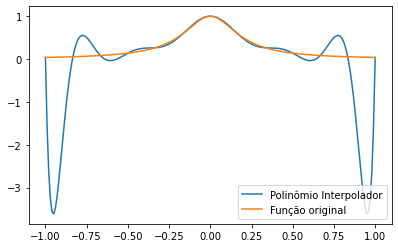

In [ ]:
#Plotar gráfico exibindo a função original (em laranja) e o polinômio interpolador (em azul)
import matplotlib.pyplot as pp

fig, ax = plt.subplots(figsize=(6.5, 4))

ax.plot(x_nodes, lagrange, label="Polinômio Interpolador")
ax.plot(x_nodes, f_values, label="Função original")
ax.legend(loc='lower right', ncol=1)
pp.show()

In [ ]:
#Avaliação do erro cometido (para interpolações de 1 ponto até 30)
n = 200
x_nodes = np.linspace(-1, 1, num=n)
f_values = [f(x) for x in x_nodes]
max = []
for k in range (1, 31):
  points = calc_points(k)
  y_values = [f(x) for x in points]
  lagrange = lagrange_g(points, x_nodes, y_values)
  max.append(np.amax(np.abs(np.subtract(lagrange,f_values))))
print(max)

[0.9609075626337021, 0.6462154882793217, 0.7063891029897035, 0.43821137368924007, 0.4321051132111724, 0.6165460978102542, 0.2468442785054391, 1.045143324880877, 0.3000958872642873, 1.9155693302903314, 0.5541788160674281, 3.655397210565595, 1.0638641092021128, 7.190769605229046, 2.0979147372741807, 14.328615753930515, 4.220110521325835, 29.134116001749664, 8.52658353683148, 58.514147110447325, 17.301950226505053, 122.93710214704548, 36.324019802936114, 257.2077593966554, 75.75076419822628, 534.7441474256326, 157.03142394385387, 1105.460860843384, 323.76907011730606, 2273.4801914728428]


Gostaríamos de plotar o valor do erro máximo obtido para cada número k de pontos de interpolação para k no intervalo [1,30]. Esse gráfico possibilitará estudar como o erro entre o polinômio interpolador e a função original se comporta conforme aumentamos os pontos de interpolação.

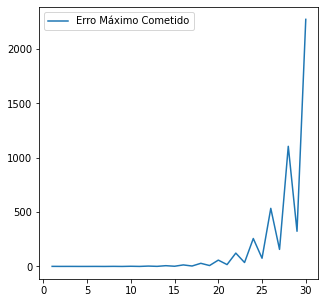

In [ ]:
pp.figure(figsize=(5,5))
pp.plot([k for k in range(1,31)], max, label="Erro Máximo Cometido")
pp.legend(loc='upper left', ncol=1)
pp.show()

**Conclusões**

Pode-se observar que aumentar os pontos de interpolação do polinômio interpolador (implementado a partir da fórmula de Lagrange, neste trabalho) não amplia a acurácia do polinômio interpolador resultante. Pelo contrário, o gráfico acima possibilita verificar que o aumento dos pontos de interpolação colabora para elevar o erro obtido entre o valor da função original e de seu polinômio de Lagrange.

No entanto, é essencial destacar que essa constatação não viola, sob nenhuma hipótese, o Teorema de Weistrass. Isso se deve ao fato de que o Teorema de Weistrass meramente garante a existência de um polinômio $p_{x}$ tal que $$\lim{k \to \infty}{|f(x) - P(x)|} = 0$$, não havendo nenhuma menção sobre a forma específica deste polinômio. Portanto, conclui-se, inequivocamente, que a anomalia detectada neste exercício indica que o polinômio utilizado para interpolação (polinômio de Lagrange) não possui a propriedade de convergência uniforme, sendo, destarte, inócua qualquer tentativa de utilizá-lo para validar o Teorema de Weistrass.

##**Exercício 2**##

Como instruído no enunciado, usaremos a biblioteca SciPy para implementar a interpolação por splines cúbicas

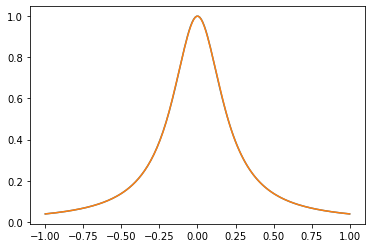

In [ ]:
from scipy.interpolate import CubicSpline
#Pontos de interpolacao via CubicSpline
k_c = 20
points_spline = calc_points(k_c)
y_values_spline = [f(x) for x in points_spline]
interpolator_cs = CubicSpline(points_spline,y_values_spline)

interpol_cs = interpolator_cs(x_nodes)

pp.plot(x_nodes, f_values)
pp.plot(x_nodes, interpol_cs)
pp.show()

Acima plotamos o polinômio interpolador e a função f(x) original, evidenciando graficamente que o método das Splines Cúbidas logrou um erro drasticamente menor do que o fornecido via Lagrange.

Analogamente ao que fizemos para o polinômio de Lagrange, plotaremos um gráfico do erro máximo gerado pela interpolação com k pontos por k, no intervalo [1,30]

In [ ]:
#Avaliação do erro cometido (para interoplações de 1 ponto até 30)
n = 200
f_values = [f(x) for x in x_nodes]
x_nodes = np.linspace(-1, 1, num=n)
pp.figure(figsize=(20,20))
max = []
for k in range (1, 31):
  points = calc_points(k)
  y_values = [f(x) for x in points]
  interpolator_cs = CubicSpline(points, y_values)
  interpol_cs = interpolator_cs(x_nodes)
  max.append(np.amax(np.abs(np.subtract(interpol_cs,f_values))))
print(max)

[0.9609075626337021, 0.6462154882793218, 0.7063891029897034, 0.3169135152831144, 0.4309507822105192, 0.132436774496821, 0.24658751182878869, 0.05603380214504372, 0.14248060361177883, 0.021948423872733658, 0.0837672207615825, 0.00690491036521923, 0.05016765764806974, 0.002482231982436467, 0.030652490005381283, 0.003744202731657764, 0.01912103677883359, 0.003711220520726477, 0.012182639157307773, 0.003178841668076471, 0.00792947562550006, 0.0025224905742132764, 0.005272606162943672, 0.0019083055164299534, 0.003580947390998901, 0.0014149192205623606, 0.0024830301319777037, 0.0010366724097017332, 0.0017567312163089266, 0.0008223638169601033]


<Figure size 1440x1440 with 0 Axes>

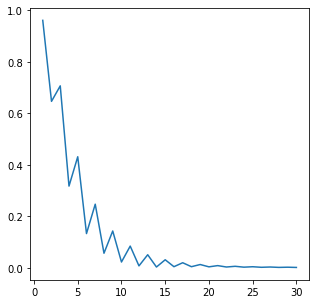

In [ ]:
pp.figure(figsize=(5,5))
pp.plot([k_c for k_c in range(1,31)], max)
pp.show()

**Conclusões**
Nota-se o exato oposto do ocorrido com o polinômio de Lagrange: o aumento dos pontos de interpolação, para o método das Splines Cúbicas, implica na redução do erro máximo cometido pelo polinômio interpolador. Conclui-se, portanto, que para a função interpolada nesse exercício, o método das Splines Cúbicas é mais recomendado que a utilização do polinômio interpolador de Lagrange.

Destarte, gostaríamos de aproximar a função do gráfico acima por uma função da forma:

$$
E(h) = C \cdot h^{q}
$$

Estimando valores para as constantes $C$ e $h$.

Nesse sentido, podemos utilizar o conhecido Método dos Mínimos Quadrados, tomando uma transformação T (efetivamente é a aplicação de um log) que altere o comportamento dos pontos distribuidos de forma linear


In [ ]:
import numpy as np

#Método dos Mínimos quadrados

#define as funções
def f1(x):
  return 1

def f2(x):
  return x

#número de variaveis a serem calculadas

h = [2/i for i in range(1,31)]

Erro = max

h = np.log(h)
erro = np.log(Erro)

#Ln(Y)=Ln(C)+q*Ln(h)

tamanho = len(h)
n = 2
A = np.zeros((tamanho,n))
b = np.zeros((tamanho,1))

for i in range(tamanho):
    A[i,0]=f1(h[i])
    A[i,1]=f2(h[i])
    b[i]=erro[i]

X1 = np.matmul(A.transpose(), A)
X2 = np.matmul(A.transpose(), b)

x = np.linalg.solve(X1,X2)

print ("Ln(C) vale: ")
print (x[0])
print ("C vale: ")
print (np.exp(x[0]))
print ("q vale: ")
print (x[1])

Ln(C) vale: 
[0.21745172]
C vale: 
[1.24290542]
q vale: 
[2.36666602]


Portanto, avalia-se $C = 1.24290542$ e $q = 2.3666602$ \
Por fim, com esses valores da constante "C" e expoente "q", podemos montar um gráfico que em muito se aproxima do erro estimado no problema

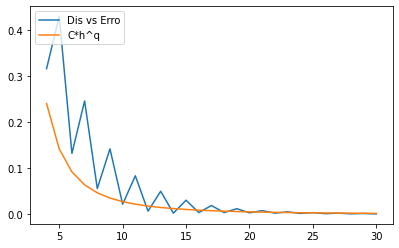

In [ ]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

def chq(t):
  return np.exp(x[0])*(t**x[1])

fig, ax = plt.subplots(figsize=(6.5, 4))

eixo_x= range(4,31)

error_fun = [chq(2/i) for i in range(4,31)]

ax.plot(eixo_x, max[3:], label='Dis vs Erro')
ax.plot(eixo_x, error_fun, label="C*h^q")

ax.legend(loc='upper left', ncol=1)
plt.show()